# Tensorflow

## A taste of static graph

Unlike "usual" programming language, tensorflow defines a compute graph before evaluating it.

When you creast variables, you only created the compute nodes.

In [ ]:
import tensorflow as tf

a = tf.constant(1.0)
b = tf.constant(1.0)
c = a+b

a, b, c

And the nodes are evaluated with a tensorflow "session"
![static_graph](https://www.tensorflow.org/images/tensors_flowing.gif)

In [ ]:
sess = tf.Session()
print(sess.run(c))
sess.close()

The variables can alo be defined with a placeholder,
only supplied when running the session

Here you can show only "relavent" part of  the graph is evaluated.

In [ ]:
a = tf.placeholder(dtype=tf.float32)
b = tf.zeros([10,10])
c = a + b
d = tf.placeholder(dtype=tf.float32)
e = a + d
sess = tf.Session()
output = sess.run(c, feed_dict={a:1})
# Since we only need c, we do not need to supply d when running
print(output)
sess.close()

## Some basic move

numpy like operations are **mostly** also supported in tensorflow, here is some basic example.
Try to familiar yourself with the matrix opereations.
In Tensorflow, most data was reperesented with tensors, which are high-rank matrices.

Here are just some essential moves like matrix multiplication and summations.
When you are not sure what certain operation does, printing out the shapes often helps.
(try to create a rank-3 tensor and experiment matrix operations with that)

In [ ]:
a = tf.constant([[0,1],[2,3]])
b = tf.constant([[1,2],[3,4],[5,6]])
c = tf.matmul(b, a)
print(c.shape)
sess =  tf.Session()
print(sess.run(c))

In [ ]:
d = tf.reduce_sum(c, axis=1)
print(d.shape)

print(sess.run(d))

## Learn a simple function with a single-layer neural network

Now will try to learn a simple function with a single-layer neural network.

First generate our dataset.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n_data = 100
x_train = np.linspace(0,5,n_data)
y_train = np.sin(x_train*4)

plt.plot(x_train, y_train)

## Prepare the Graph

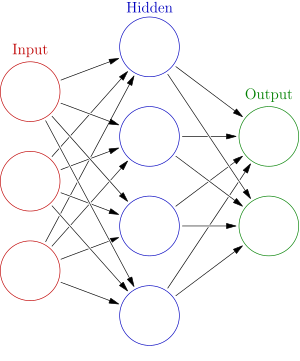

Recall for each layer of the neural network, the output is
linear combination of the nodes from previous layer.

Written in the matrix form:
$$L_{i+1}=activation(W\cdot L_i+b)$$

Here, $L_i$ should be a $n_{sample}\times n_{nodes}$ tensor, while $W$ and $b$ are variables to be optimized.

Try to complete the following code block and compute the corrent output tensor.

In [ ]:
n_hidden = 100

### The placeholder for the variables
x_tensor = tf.placeholder(shape=[n_data], dtype=tf.float32, name='x')
y_tensor = tf.placeholder(shape=[n_data], dtype=tf.float32, name='y')
w1_tensor = tf.placeholder(shape=[n_hidden], dtype=tf.float32, name='w1')
b1_tensor = tf.placeholder(shape=[n_hidden], dtype=tf.float32, name='b1')
w2_tensor = tf.placeholder(shape=[n_hidden], dtype=tf.float32, name='w2')
b2_tensor = tf.placeholder(shape=[1], dtype=tf.float32, name='b2')


# Modify this part to calculate the hidden layer
x_matrix = tf.expand_dims(x_tensor, axis=1)
w1_matrix = tf.expand_dims(w1_tensor, axis=0)
hidden_tensor = tf.tanh(tf.matmul(x_matrix, w1_matrix)+b1_tensor)

# For the output layer, we do not use the activation function
w2_matrix = tf.expand_dims(w2_tensor, axis=1)
y_pred = tf.matmul(hidden_tensor, w2_matrix)+b2_tensor

## Back propogation

The "training" of neural network means the optimization of our variables.
Generally, neural networks are trained with variantions of gradient descent algorithm.

The idea is simple, if we know the gradient of the loss function (that is, 
the error of prediction) with respect to the variables,
we can minimized the error by going to the direction where loss function decreases.


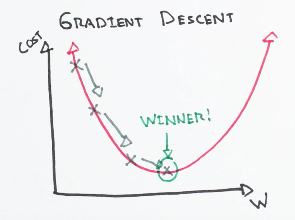

One of the key features of machine learning packages is the automated 
derivation of gradients according to the compute graph.

In [ ]:
### Define the loss function
y_matrix = tf.expand_dims(y_tensor, axis=1)
loss_tensor = tf.reduce_mean(tf.square(y_pred-y_matrix))
### Here we get the gradients of loss function with respect to our trainable variables
dw1_tensor = tf.gradients(loss_tensor, w1_tensor)[0]
db1_tensor = tf.gradients(loss_tensor, b1_tensor)[0]
dw2_tensor = tf.gradients(loss_tensor, w2_tensor)[0]
db2_tensor = tf.gradients(loss_tensor, b2_tensor)[0]

In [ ]:
## Use random values for variables to start with
w1_data = np.random.normal(size=n_hidden)
b1_data = np.random.normal(size=n_hidden)
w2_data = np.random.normal(size=n_hidden)
b2_data = np.random.normal(size=1)

In [ ]:
# In each step, we compute the gradient of the loss function, and update the variables accordingly

n_train = 10000
learning_rate = 1e-2
log_every = 1000

for i in range(n_train):
    loss, dw1, db1, dw2, db2 = sess.run([loss_tensor, 
                              dw1_tensor, db1_tensor, 
                              dw2_tensor, db2_tensor], 
                              feed_dict={x_tensor: x_train, 
                                         y_tensor: y_train, 
                                         w1_tensor: w1_data, 
                                         b1_tensor: b1_data,
                                         w2_tensor: w2_data, 
                                         b2_tensor: b2_data,})
    w1_data -= dw1 * learning_rate
    b1_data -= db1 * learning_rate
    w2_data -= dw2 * learning_rate
    b2_data -= db2 * learning_rate
    if i%log_every==0:
        print(i, loss)

In [ ]:
plt.plot(x_train, sess.run(y_pred, feed_dict={x_tensor: x_train, 
                                              w1_tensor: w1_data, 
                                              b1_tensor: b1_data,
                                              w2_tensor: w2_data, 
                                              b2_tensor: b2_data,}))
plt.plot(x_train, y_train)